Homework 12 Key
====
#### CHE 116: Numerical Methods and Statistics

4/19/2018

----

Homework Requirements:

1. Write all equations in $\LaTeX$
2. Simplify all expressions
2. Put comments in your Python code
3. Explain or show your work
4. Follow the academic honesty guidelines in the syllabus

-----

1\. Conceptual Questions (20 Points)
====

*Answer in Markdown* 2 Points each

1. What assumption do we make on the noise terms when doing linear regression? How can we check it?

2. Your friend tells you that it's important to minimize both the SSR and TSS. What's wrong with minimizing the TSS?

3. How do you justify the presence of a slope?

4. What is the best numeric value or statistic for justifying the existence of a correlation?

5. What should you plot to justify an ordinary 4-dimensional least squares regression?

6. Why do we use different number of deducted degrees of freedom when doing hypothesis testing vs performing the regression?

7. Write a model equation for 3-dimensional ordinary least squares regression with an intercept. For example, a one dimensional model equation without an intercept would be $y = \beta_0 x + \epsilon$

8. Write a model equation for when $y \propto \ln{x}$. Assume no intercept

9. Write a model equation for a person's life expectancy ($l$) assuming it depends on gender ($s$) and if the person eats vegetables ($v$). Assume for this problem that gender and eating vegetables are both binary (0 or 1). 

10. Write a model equation for homework performanced ($h$) based on music genre listended to while working. The following genres are conisdered: Kwaito, Electroswing, and Djent Metal. You can only listen to one genre at a time. Use the letters $k$, $e$, and $d$.

### 1.1 
Normal. Shapiro-Wilks

### 1.2
TSS is fixed based on data and cannot change based on model parameters

### 1.3
Hypothesis test on slope coefficient or Spearman hypothesis test

### 1.4
$p$-value for slope or $p$-value from Spearman hypothesis test

### 1.5
$\hat{y}$ vs $y$ or histogram residuals

### 1.6
In regression, ddof is number of parameters. In hypothesis test, we assume null which means the paraemter we're considering is 0 and not part of model. 

### 1.7
$y = \beta_0 x_0 + \beta_1 x_1 + \beta_2 x_2 + \beta_3 + \epsilon$

### 1.8

$y = \beta \ln x +  \epsilon$

### 1.9

$l = \beta_0 \delta_s + \beta_1 \delta_v + \beta_2 \delta_v\delta_s + \beta_3 + \epsilon$

### 1.10
**no interaction, because you can only listen to one at a time**

$h = \beta_0 \delta_k + \beta_1 \delta_e + \beta_2 \delta_d + \beta_3 + \epsilon$

2\. Short Answer Questions (16 Points)
====

*Answer in Python or Markdown as appropiate* 4 Points each

1. If $\sigma_{xy} = -2.1$, $\sigma_{x}^2 = 3.5$, $\sigma_{y}^2  = 1.7$, what is the best fit slope? How does it change if the intercept is $-2.1$?

2. If your model equation is $y = \beta_0 + \beta_1 x + \beta_2 z + \epsilon$, what is the deducted degrees of freedom?

3. If $N = 12$, $D = 2$, and $S^2_{\beta_0} = 2.5$, what is the width of a 90% confidence interval for $\beta_0$?

4. If your best fit intercept is $\hat{\alpha} = 3$ with a standard error of $0.7$, what is the $p$-value for the existence of the that intercept? Take $N = 15$ and assume it's 1D OLS.


### 2.1

In [1]:
slope = -2.1 / 3.5
print(slope, 'no change if wrt intercept')

-0.6 no change if wrt intercept


### 2.2
$D = 3$

### 2.3

In [2]:
import scipy.stats as ss
import numpy as np
T = ss.t.ppf(0.95, 12 - 2)
print(np.sqrt(2.5) * T)

2.86575265929


### 2.4

In [3]:
T = 3 / 0.7
p = (1 - (ss.t.cdf(T, 15 - 1) - ss.t.cdf(-T, 15 - 1)))
print(p)

0.000754107597155


3\. Linearized Regression (24 Points)
===

Regress the following data to the model equation $y = \beta_0 \ln x + \beta_1 x + \beta_2 +\epsilon$ using a linearization so that you use ND OLS. Report the following:

1. [4 points] Justification for regression. Use words and statistics.
2. [12 points] Fit coefficients with 95% confidence intervals.
3. [4 points] Plot fit
4. [4 points] Show if residuals are normal

```python
x = [0.2, 0.29, 0.39, 0.48, 0.57, 0.66, 0.76, 0.85, 0.94, 1.04, 1.13, 1.22, 1.31, 1.41, 1.5]
y = [2.92, 2.58, 3.18, 4.27, 4.5, 3.93, 4.32, 4.57, 4.55, 4.7, 5.02, 4.21, 3.04, 4.98, 6.45]
```

In [4]:
x = [0.2, 0.29, 0.39, 0.48, 0.57, 0.66, 0.76, 0.85, 0.94, 1.04, 1.13, 1.22, 1.31, 1.41, 1.5]
y = [2.92, 2.58, 3.18, 4.27, 4.5, 3.93, 4.32, 4.57, 4.55, 4.7, 5.02, 4.21, 3.04, 4.98, 6.45]
x = np.array(x)
y = np.array(y)

In [5]:
#justification
ss.spearmanr(x, y)

SpearmanrResult(correlation=0.66071428571428559, pvalue=0.007330569830891703)

$p$-value shows the correlation is significant.

In [6]:
#fit
x_mat = np.column_stack( (np.log(x), x, np.ones(len(x))) )
beta, *_ = np.linalg.lstsq(x_mat, y)
print(beta)

[ 1.19374141 -0.07794449  4.6485906 ]


In [7]:
#confidence intervals
yhat = beta[0] * np.log(x) + beta[1] * x + beta[2] 
s2_e = np.sum( (yhat - y)**2 ) / (len(x) - len(beta))
se2_beta = s2_e * np.linalg.inv(x_mat.transpose() @ x_mat)
for i in range(len(beta)):
    T = ss.t.ppf(0.975, len(x) - len(beta)) 
    cwidth = T * np.sqrt(se2_beta[i,i]) 
    print("beta_{} is {:.3f} +/- {:.3f} with 95% confidence".format(i, beta[i], cwidth)) 

beta_0 is 1.194 +/- 2.783 with 95% confidence
beta_1 is -0.078 +/- 4.057 with 95% confidence
beta_2 is 4.649 +/- 4.303 with 95% confidence


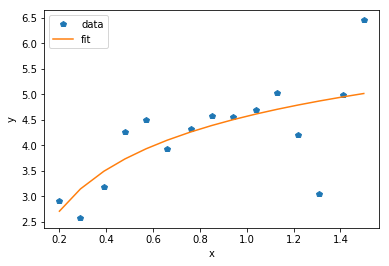

In [8]:
#plot
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(x,y, 'p', label='data')
plt.plot(x, yhat, '-', label='fit')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


In [9]:
ss.shapiro(y - yhat)

(0.908310055732727, 0.12756651639938354)

The $p$-value is 0.13, so the residuals are not not normal. So probably normal

4\. Non-Linear Regression (12 Points)
====

Repeat problem 3 with non-linear least squares instead. Only do the computation of the coefficients with confidence intervals. Be sure to write out your partials making up your $F$-matrix in markdown.

In [10]:
#fit
import scipy.optimize as opt

def SSR(beta):
    yhat =  beta[0] * np.log(x) + beta[1] * x + beta[2] 
    return np.sum( (yhat - y)**2)
result = opt.minimize(SSR, x0=[1,1,1])
print(result.message)
print(result.x)

Optimization terminated successfully.
[ 1.19374083 -0.07794365  4.6485897 ]


$$
F_0 = \ln x
$$
$$
F_1 = x
$$
$$
F_2 = \vec{1}
$$

In [11]:
#making F
f_mat = np.column_stack( (np.log(x), x, np.ones(len(x))) )

In [12]:
#confidence intervals
yhat = beta[0] * np.log(x) + beta[1] * x**2 + beta[2] 
s2_e = np.sum( (yhat - y)**2 ) / (len(x) - len(beta))
#MAKE SURE THEY CHANGE TO f_mat AND NOT REPEAT x_mat
se2_beta = s2_e * np.linalg.inv(f_mat.transpose() @ f_mat)
for i in range(len(beta)):
    T = ss.t.ppf(0.975, len(x) - len(beta)) 
    cwidth = T * np.sqrt(se2_beta[i,i]) 
    print("beta_{} is {:.3f} +/- {:.3f} with 95% confidence".format(i, beta[i], cwidth)) 

beta_0 is 1.194 +/- 2.789 with 95% confidence
beta_1 is -0.078 +/- 4.065 with 95% confidence
beta_2 is 4.649 +/- 4.312 with 95% confidence
